## Kaggle Problem - Part 3

Xiuyuan Zhang

I chose a dataset from the kaggle dataset named "Where it Pays to Attend College." I used the data file "salaries-by-college-type.csv"

In [36]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import scipy.stats as stats
import pandas as pd

In [37]:
def get_income_data(filename):
    '''
    Read a csv file and store needed information in a list
    
    Input: filename: string
    
    Returns: ls: list of a tuple (school_type, starting_median_salary)
    '''
    cols_to_keep = ["School Type", "Starting Median Salary"]
    incomes = pd.read_csv(filename, usecols = cols_to_keep)
    ls = []
    incomes.rename(columns = {"School Type": "school_type", "Starting Median Salary": "starting_median_salary"}, inplace = True)
    for idx, income in incomes.iterrows():
        ls.append((income["school_type"], float(income["starting_median_salary"].replace("$","").replace(",", ""))))
        
    return ls

In [38]:
incomes = get_income_data("salaries-by-college-type.csv")

In [45]:
# I then generate respective lists of median starting salaries according to school types
# I store these lists as numpy arrays
# School Types: "Engineering", "Party", "Liberal Arts", "State", "Ivy League"
inc_engineering = []
inc_party = []
inc_liberal = []
inc_state =[]
inc_ivyleague = []

for income in incomes: 
    if income[0] == "Engineering":
        inc_engineering.append(income[1])
    elif income[0] == "Party":
        inc_party.append(income[1])
    elif income[0] == "Liberal Arts":
        inc_liberal.append(income[1])
    elif income[0] == "State":
        inc_state.append(income[1])
    elif income[0] == "Ivy League":
        inc_ivyleague.append(income[1])
        
inc_engineering = np.array(inc_engineering)
inc_party = np.array(inc_party)
inc_liberal = np.array(inc_liberal)
inc_state = np.array(inc_state)
inc_ivyleague = np.array(inc_ivyleague)

The mean for state schools' median starting salary is 44126.28571428572, and the standard deviation is 4256.852684262189.
The mean for engineering schools' median starting salary is 59057.89473684211, and the standard deviation is 7633.741980215117.
The mean for party schools' median starting salary is 45715.0, and the standard deviation is 3592.391264881931.
The mean for liberal art schools' median starting salary is 45746.8085106383, and the standard deviation is 4322.127680522185.
The mean for Ivy League schools' median starting salary is 60475.0, and the standard deviation is 3010.710049141232.


<IPython.core.display.Javascript object>


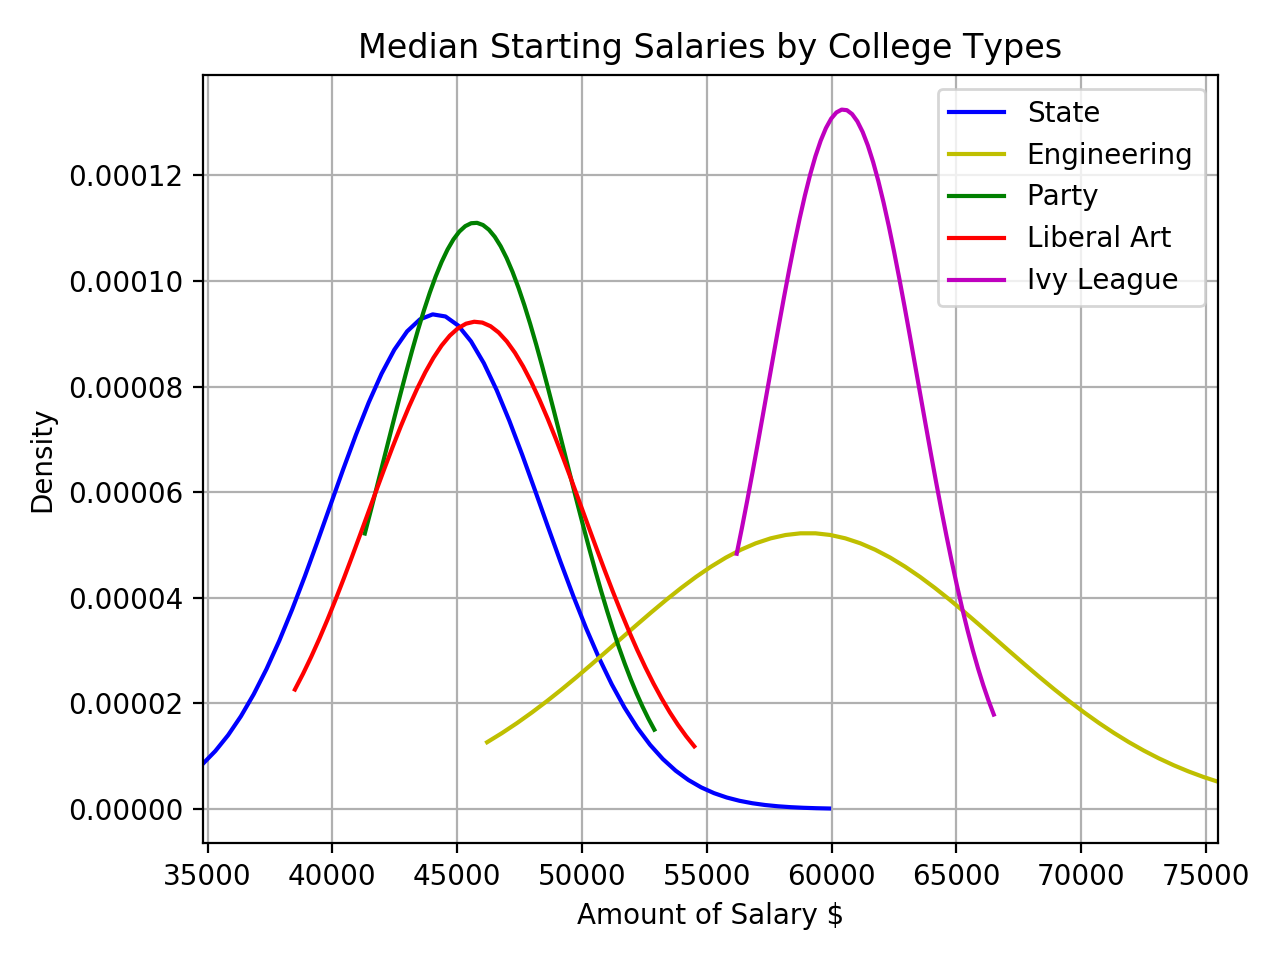

In [50]:
# compute and print the mean and standard for all five types of schools' median starting salary
state_mean = np.mean(inc_state) #try inc_state 
state_sd = np.std(inc_state)
engineering_mean = np.mean(inc_engineering)
engineering_sd = np.std(inc_engineering)
party_mean = np.mean(inc_party)
party_sd = np.std(inc_party)
liberal_mean = np.mean(inc_liberal)
liberal_sd = np.std(inc_liberal)
ivy_mean = np.mean(inc_ivyleague)
ivy_sd = np.std(inc_ivyleague)

print("The mean for state schools' median starting salary is {}, and the standard deviation is {}.".format(state_mean, state_sd))
print("The mean for engineering schools' median starting salary is {}, and the standard deviation is {}.".format(engineering_mean, engineering_sd))
print("The mean for party schools' median starting salary is {}, and the standard deviation is {}.".format(party_mean, party_sd))
print("The mean for liberal art schools' median starting salary is {}, and the standard deviation is {}.".format(liberal_mean, liberal_sd))
print("The mean for Ivy League schools' median starting salary is {}, and the standard deviation is {}.".format(ivy_mean, ivy_sd))

# Below are my steps to set up five data series within one figure
# The plot is showing the distribution of median starting salaries for different types of schools
# which are: state, party, ivy league, liberal art, and engineering.
x_state = np.linspace(min(inc_state), max(inc_state))
x_engineering = np.linspace(min(inc_engineering), max(inc_engineering))
x_party = np.linspace(min(inc_party), max(inc_party))
x_liberal = np.linspace(min(inc_liberal), max(inc_liberal))
x_ivy = np.linspace(min(inc_ivyleague), max(inc_ivyleague))
fit_state = stats.norm.pdf(x_state, state_mean, state_sd)
fit_engineering = stats.norm.pdf(x_engineering, engineering_mean, engineering_sd)
fit_party = stats.norm.pdf(x_party, party_mean, party_sd)
fit_liberal = stats.norm.pdf(x_liberal, liberal_mean, liberal_sd)
fit_ivy = stats.norm.pdf(x_ivy, ivy_mean, ivy_sd)
plt.plot(x_state, fit_state, "b-", label = "State")
plt.plot(x_engineering, fit_engineering, "y-", label = "Engineering")
plt.plot(x_party, fit_party, "g-", label = "Party")
plt.plot(x_liberal, fit_liberal, "r-", label = "Liberal Art")
plt.plot(x_ivy, fit_ivy, "m-", label = "Ivy League")
plt.xlim(min(inc_state), max(inc_engineering))
ll = plt.legend(loc = "upper right")

plt.title('Median Starting Salaries by College Types')
plt.ylabel("Density")
plt.xlabel("Amount of Salary $")
plt.grid(True)

plt.tight_layout()
plt.show()


I generated a plot, using the given data, describing the distribution of median starting salaries of different colleges from five different college types: state, engineering, party, liberal art, and Ivy League. 

From the plot above, one can see that state colleges have the lowest median starting salaries, while engineering type school has the highest median starting salaries. However, the distribution for ivy league schools' starting salary is more concentrated at $ 60475 with a smaller variance than all the other school types, according to the calculation.
Moreover, one can see that the distribution of state, party and liberal art's colleges are similar in comparison to the engineering or the Ivy league's distributions. All of them are bell-curved, although the engineering's distribution is more flat with a larger variance.